In [7]:
import pandas as pd
import logomaker as lm
import numpy as np
import lacroix

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
data_df = pd.read_csv('250226_LA_randpad_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df2515 = pd.read_csv('250226_LA_recombine2515_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10015 = pd.read_csv('250226_LA_recombine10015_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10 = pd.read_csv('250228_LA_weightedmean_10x10.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10_075p = pd.read_csv('250228_LA_weightedmean_10x10_075penalty.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10_10p = pd.read_csv('250228_LA_weightedmean_10x10_10penalty.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x5 = pd.read_csv('250228_LA_weightedmean_10x5.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)

In [3]:
data_df['name'].value_counts()

name
Kerato-epithelin__AP00095                                660
Myocilin__AP00090                                        472
Ovalbumin__AP00094                                       385
Glucan_1_3-beta-glucosidase__AP00110                     290
Odontogenic_ameloblast-associated_protein__AP00021       264
Alpha-s2-casein__AP00004                                 207
Prolactin__AP00001                                       199
Beta-lactoglobulin__AP00025                              162
Apomyoglobin__AP00030                                    153
Galectin-7__AP00139                                      136
DNA-binding_protein_inhibitor_ID-2__AP00076              134
Elicitor_of_hypersensitive_response_HpaG__AP00071        133
Lysozyme_C__AP00016                                      130
Chorion_class_A_protein_PC292__AP00046                   113
RdIB_protein__AP00133                                    105
Serum_Amyloid_A-1__AP00005                               104
ApoAII__AP00127    

In [35]:
def hex_to_rgb(hex_code):
    """Convert a hex color code to an RGB tuple in the range of 0 to 1."""
    # Remove the hash symbol if it exists
    hex_code = hex_code.lstrip('#')
    
    # Convert the hex code to RGB values
    r = int(hex_code[0:2], 16) / 255.0
    g = int(hex_code[2:4], 16) / 255.0
    b = int(hex_code[4:6], 16) / 255.0
    
    return np.array([r, g, b])

In [53]:
lcb = hex_to_rgb(lacroix.colorList('Berry')[4])
lcg = hex_to_rgb(lacroix.colorList('Lime')[2])

In [54]:
d = {'R': lcb,
 'r': lcb,
 'K': lcb,
 'k': lcb,
 'D': lcb,
 'd': lcb,
 'E': lcb,
 'e': lcb,
 'N': lcb,
 'n': lcb,
 'Q': lcb,
 'q': lcb,
 'S': lcg,
 's': lcg,
 'G': lcg,
 'g': lcg,
 'H': lcg,
 'h': lcg,
 'T': lcg,
 't': lcg,
 'A': lcg,
 'a': lcg,
 'P': lcg,
 'p': lcg,
 'Y': np.array([0., 0., 0.]),
 'y': np.array([0., 0., 0.]),
 'V': np.array([0., 0., 0.]),
 'v': np.array([0., 0., 0.]),
 'M': np.array([0., 0., 0.]),
 'm': np.array([0., 0., 0.]),
 'C': np.array([0., 0., 0.]),
 'c': np.array([0., 0., 0.]),
 'L': np.array([0., 0., 0.]),
 'l': np.array([0., 0., 0.]),
 'F': np.array([0., 0., 0.]),
 'f': np.array([0., 0., 0.]),
 'I': np.array([0., 0., 0.]),
 'i': np.array([0., 0., 0.]),
 'W': np.array([0., 0., 0.]),
 'w': np.array([0., 0., 0.])}

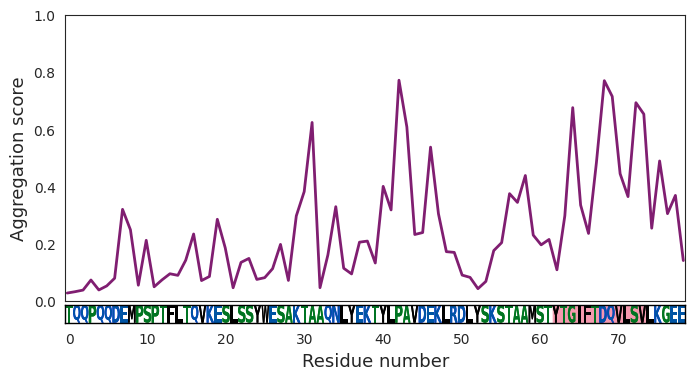

In [96]:
name = ' Apoliprotein__AP00020'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  # Create subplots with specified height ratios and no vertical space between subplots
ax1.plot(data_df10x10[data_df10x10['name'] == name]['spiky_prob'].reset_index(drop=True), color=lacroix.colorList('Berry')[2], lw=2, label='spiky (10x10)')
ax1.set_ylabel('Aggregation score', fontsize=13)
input_string = str(data_df[data_df['name'] == name]['sequence'].reset_index(drop=True)[0])
wt_seq = input_string
count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
ax1.set_xlim([0-0.25,len(input_string)-1+0.25])
ax1.set_ylim([0,1])

logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
logo_wt.rgb_dict = d 
logo_wt._compute_glyphs()
logo_wt.draw()
logo_wt.highlight_position_range(pmin=62, pmax=73, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)

logo_wt.ax.set_title('')
logo_wt.ax.xaxis.set_ticks_position('none')
logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
logo_wt.ax.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
plt.xlabel('Residue number', fontsize=13)

plt.show()